In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,57.901064,23.414535,7.662850,18.317888,20.436051
1,55.341577,2.971013,7.310655,29.475570,19.644843
2,56.600023,7.318999,13.324409,18.378797,23.537768
3,48.105031,10.594554,9.545876,-5.005605,16.739702
4,51.931292,0.647610,6.284058,14.796602,15.438889


<AxesSubplot:ylabel='Density'>

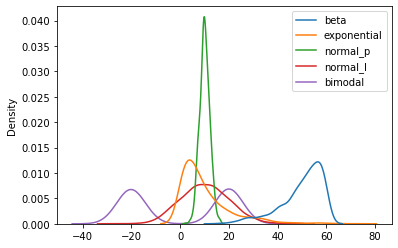

In [3]:
sns.kdeplot(data=df)

In [4]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.044432,10.216293,10.060866,10.291598,-0.048407
std,8.628725,10.538946,2.083770,9.845005,20.281789
min,16.433826,0.002906,2.363044,-26.482704,-29.011356
25%,46.126382,2.997837,8.719807,3.624910,-20.302978
50%,52.388029,6.959940,10.011734,10.047060,0.522577
75%,56.565742,13.522314,11.368985,16.879298,19.934442
max,59.995934,72.600145,16.450279,47.531271,27.399637


<AxesSubplot:ylabel='Density'>

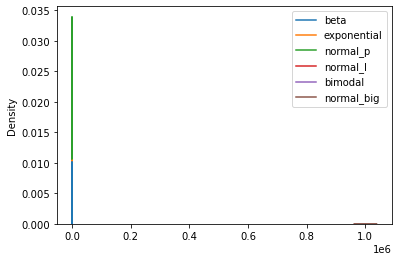

In [11]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

In [9]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.044432,10.216293,10.060866,10.291598,-0.048407,1.000821e+06
std,8.628725,10.538946,2.083770,9.845005,20.281789,1.002120e+04
min,16.433826,0.002906,2.363044,-26.482704,-29.011356,9.710368e+05
25%,46.126382,2.997837,8.719807,3.624910,-20.302978,9.941856e+05
50%,52.388029,6.959940,10.011734,10.047060,0.522577,1.000546e+06
75%,56.565742,13.522314,11.368985,16.879298,19.934442,1.007887e+06
max,59.995934,72.600145,16.450279,47.531271,27.399637,1.033513e+06


<AxesSubplot:>

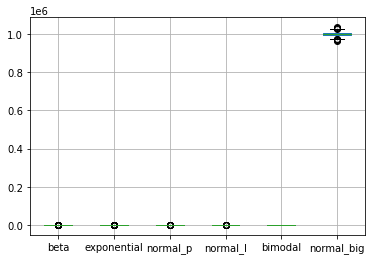

In [6]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

In [7]:
# Khai báo đối tượng StandardScaler
s_scaler = StandardScaler()
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = s_scaler.fit_transform(df)

# lấy danh sáchc cột
col_names = list(df.columns)

# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [8]:
df_s.head()


,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.234024,-0.336003,0.012537,0.274593,0.825741,0.110465
1,0.493946,-0.880348,-1.498144,0.220749,1.100203,-0.800081
2,0.619910,-0.926098,-0.803126,0.475934,1.158542,1.297560
3,0.687534,0.483036,-0.666442,1.765624,1.064769,-0.681522
4,1.143794,1.746038,-0.961397,0.908080,0.875760,-0.746581


<AxesSubplot:ylabel='Density'>

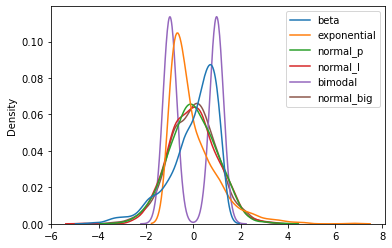

In [9]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

In [10]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.909584e-16,-8.015810e-17,4.875544e-16,-1.757622e-17,-4.362066e-16,-3.710698e-15
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.224700e+00,-1.012783e+00,-3.185400e+00,-4.633774e+00,-1.459757e+00,-3.544222e+00
25%,-4.701959e-01,-7.331020e-01,-6.744989e-01,-7.211026e-01,-9.793360e-01,-7.040899e-01
50%,2.714692e-01,-3.247363e-01,-1.983805e-02,-2.655914e-02,-3.374662e-02,3.638998e-02
75%,7.584779e-01,4.394463e-01,6.940754e-01,6.566217e-01,9.886963e-01,6.569256e-01
max,1.187096e+00,6.724474e+00,3.689684e+00,3.331877e+00,1.479289e+00,3.426135e+00


<AxesSubplot:>

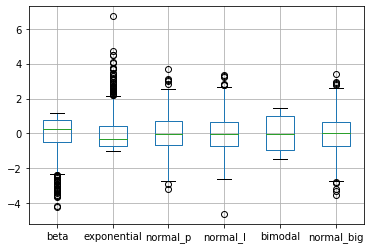

In [11]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_s = scaler.fit_transform(df)
col_names = list(df.columns)
df_s = pd.DataFrame(df_s, columns=col_names)
df_s


,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.552622,0.087470,0.465149,0.616192,0.777633,0.524318
1,0.871919,0.017117,0.245416,0.609432,0.871018,0.393687
2,0.895194,0.011204,0.346508,0.641468,0.890867,0.694625
3,0.907690,0.193327,0.366389,0.803374,0.858961,0.410696
4,0.991999,0.356563,0.323487,0.695719,0.794651,0.401363
...,...,...,...,...,...,...
995,0.987039,0.066062,0.334756,0.501688,0.157852,0.536519
996,0.821932,0.215944,0.532357,0.607491,0.202592,0.519498
997,0.813877,0.025628,0.277826,0.463082,0.138196,0.474823
998,0.843835,0.081446,0.419804,0.647765,0.010617,0.493907


In [13]:
mins=[df_s[col].min() for col in df_s.columns]
mins


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

<AxesSubplot:ylabel='Density'>

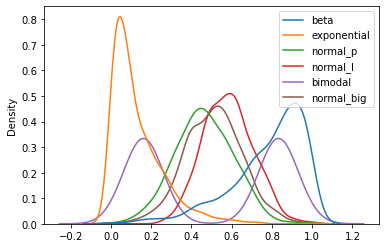

In [14]:
sns.kdeplot(data=df_s)

### Chuẩn hóa dữ liệu với Robust Scaling

In [17]:
from sklearn.preprocessing import RobustScaler
#khai báo đối tượng RobustScaler
scaler = RobustScaler()
df_s = scaler.fit_transform(df)
col_names=list(df.columns)
df_s = pd.DataFrame(df_s, columns=col_names)
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,-1.225300,-0.009609,0.023656,0.218587,0.436724,0.054426
1,0.181071,-0.473850,-1.080180,0.179505,0.576185,-0.614593
2,0.283591,-0.512867,-0.572338,0.364727,0.605828,0.926639
3,0.338629,0.688903,-0.472465,1.300829,0.558179,-0.527482
4,0.709973,1.766046,-0.687985,0.678394,0.462140,-0.575285


<AxesSubplot:ylabel='Density'>

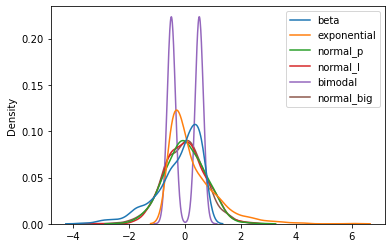

In [18]:
sns.kdeplot(data=df_s)